In [2]:
import torch
import torchvision
import torchvision.transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import requests
import numpy as np
import os
from torchvision.io import read_image
from torchvision.datasets import ImageFolder
from torch import nn, optim

import PIL
import pandas as pd

## 데이터 로드

In [3]:
CAT_DATA_DIR = "data/train/cat/"
CAT_FILE_LIST = os.listdir(CAT_DATA_DIR)

DOG_DATA_DIR = "data/train/dog/"
DOG_FILE_LIST = os.listdir(DOG_DATA_DIR)

In [4]:
CAT_AND_DOG_LIST = CAT_FILE_LIST + DOG_FILE_LIST
FILE_DIR = [CAT_DATA_DIR, DOG_DATA_DIR]

In [5]:
for i in range(10):
    if "cat" in CAT_AND_DOG_LIST[i]:
        print("cat!")
    else:
        print("dog!")

cat!
cat!
cat!
cat!
cat!
cat!
cat!
cat!
cat!
cat!


In [6]:
len(CAT_AND_DOG_LIST)

2000

In [7]:
img = read_image(os.path.join(CAT_DATA_DIR, CAT_FILE_LIST[0]))

In [8]:
img

tensor([[[203, 203, 204,  ..., 240, 239, 238],
         [203, 203, 204,  ..., 241, 240, 238],
         [203, 203, 204,  ..., 241, 240, 239],
         ...,
         [153, 153, 153,  ...,   2,   2,   2],
         [152, 152, 152,  ...,   2,   2,   2],
         [151, 151, 151,  ...,   1,   1,   1]],

        [[164, 164, 165,  ..., 201, 200, 199],
         [164, 164, 165,  ..., 202, 201, 199],
         [164, 164, 165,  ..., 202, 201, 200],
         ...,
         [122, 122, 122,  ...,   2,   2,   2],
         [121, 121, 121,  ...,   2,   2,   2],
         [120, 120, 120,  ...,   1,   1,   1]],

        [[ 87,  87,  88,  ..., 122, 121, 120],
         [ 87,  87,  88,  ..., 123, 122, 120],
         [ 87,  87,  88,  ..., 123, 122, 121],
         ...,
         [ 55,  55,  55,  ...,   0,   0,   0],
         [ 54,  54,  54,  ...,   0,   0,   0],
         [ 53,  53,  53,  ...,   0,   0,   0]]], dtype=torch.uint8)

In [9]:
type(img)

torch.Tensor

## DataLoader

In [10]:
class CustomImageDataset(Dataset):
    
    def __init__(self, img_file_list, FILE_DIR,
                 transform=None):
        self.img_file_list = img_file_list
        self.img_dir = FILE_DIR
        self.transform = transform
        
    #dataset의 전체 개수를 알려준다
    def __len__(self):
        return len(self.img_file_list)
    
    def __getitem__(self, idx):
        # 이미지 read 및 label 저장
        # cat
        if "cat" in self.img_file_list[idx]:
            image = read_image(os.path.join(self.img_dir[0], self.img_file_list[idx]))
            label = 0
        # dog
        else:
            image = read_image(os.path.join(self.img_dir[1], self.img_file_list[idx]))
            label = 1


        # image와 label transform 
        if self.transform:
            image = self.transform(image)
        
        # image, label을 return
        return image, label

## Check DataLoader

In [11]:
#데이터로더 확인

dataset = CustomImageDataset(CAT_AND_DOG_LIST,FILE_DIR)

#이미지의 scale이 다르다! transform이 필요하다
dataLoader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

dataiter = iter(dataLoader)
feature, target = dataiter.next()
print(feature)
print(target)


RuntimeError: stack expects each tensor to be equal size, but got [3, 323, 322] at entry 0 and [3, 400, 500] at entry 1

## Transform

In [12]:
transform = torchvision.transforms.Compose([
    #ToTensor을 바로하려니 오류 발생
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((256,256)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

## Check DataLoader

In [13]:
#데이터로더 확인

dataset = CustomImageDataset(CAT_AND_DOG_LIST,FILE_DIR, transform)
dataLoader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [88]:
dataiter = iter(dataLoader)
feature, target = dataiter.next()
print(feature)
print(target)

tensor([[[[-0.2706, -0.3176, -0.3647,  ..., -0.3961, -0.4353, -0.4745],
          [-0.2392, -0.2549, -0.3490,  ..., -0.3961, -0.4196, -0.4510],
          [-0.2000, -0.1765, -0.2235,  ..., -0.4196, -0.4275, -0.4353],
          ...,
          [-0.4902, -0.4824, -0.5059,  ...,  0.7098,  0.7412,  0.7412],
          [-0.4745, -0.4667, -0.4980,  ...,  0.6863,  0.7255,  0.7412],
          [-0.4588, -0.4588, -0.4667,  ...,  0.7176,  0.7412,  0.7490]],

         [[-0.5765, -0.6078, -0.6314,  ..., -0.4588, -0.4510, -0.4510],
          [-0.5373, -0.5451, -0.6157,  ..., -0.4510, -0.4353, -0.4196],
          [-0.4980, -0.4588, -0.4824,  ..., -0.4510, -0.4275, -0.4118],
          ...,
          [-0.6078, -0.6078, -0.6471,  ...,  0.6941,  0.7098,  0.6863],
          [-0.5843, -0.5843, -0.6314,  ...,  0.6706,  0.6863,  0.6784],
          [-0.6314, -0.6392, -0.6392,  ...,  0.6627,  0.6706,  0.6706]],

         [[-0.6157, -0.6549, -0.6784,  ..., -0.3882, -0.3882, -0.4039],
          [-0.5922, -0.6000, -

In [89]:
tensor_2_PIL = torchvision.transforms.ToPILImage()
image = tensor_2_PIL(feature[0])

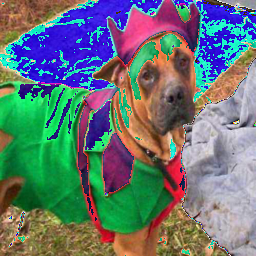

In [90]:
image

In [91]:
target[0]

tensor(1)

In [22]:
print(len(dataLoader))

500


## Pretrained Model

In [24]:
dog_cat_classification_resnet = torchvision.models.resnet50(pretrained=True)

In [25]:
#마지막 outfeature가 1000임. 
dog_cat_classification_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
num_ftrs = dog_cat_classification_resnet.fc.in_features

dog_cat_classification_resnet.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_ftrs, 1024),
    nn.Dropout(0.2),
    nn.Linear(1024, 512),
    nn.Dropout(0.1),
    nn.Linear(512, 1),
    nn.Sigmoid()    
)

In [27]:
dog_cat_classification_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Model train

In [28]:
learning_rate = 0.1
model     = dog_cat_classification_resnet
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
loss_fn   = nn.BCELoss()

In [29]:
n_epochs = 1
loss_list=[]
cnt = 0
#n_epochs

for epoch in range(n_epochs):
    running_loss = 0.0

    for x, y in dataLoader:
      #clear gradient 
        pred = model(x)
        pred = pred.squeeze()
        print(pred)
        print(y)


        optimizer.zero_grad()
        loss=loss_fn(pred.to(torch.float32), y.to(torch.float32))
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss.data)
        running_loss += loss.item()
        #print(loss.item())
    cost = running_loss / len(dataLoader)
    
    if(epoch % 1 == 0):
        print("epoch %d, loss : %.3f" %(epoch, cost))

tensor([0.4578, 0.4764, 0.4378, 0.4274], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 0])
tensor([0.5618, 0.4641, 0.4716, 0.4817], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.4752, 0.4731, 0.3983, 0.4786], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([0.5214, 0.4602, 0.4761, 0.4760], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([0.5275, 0.5042, 0.4772, 0.5183], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.5436, 0.4615, 0.4566, 0.4715], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.5460, 0.4875, 0.5498, 0.4600], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.4364, 0.5766, 0.5050, 0.4809], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.5418, 0.5309, 0.5427, 0.4515], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.5284, 0.5256, 0.4837, 0.5319], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.4932, 0.4562, 0.5525, 0.4504], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 0])
tensor([0.

tensor([0.2556, 0.4185, 0.6542, 0.5806], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 1])
tensor([0.4547, 0.4630, 0.3951, 0.4321], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.2499, 0.2515, 0.5575, 0.6671], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 1])
tensor([0.4031, 0.5498, 0.4232, 0.2416], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 0, 0])
tensor([0.4737, 0.3601, 0.6333, 0.2190], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([0.6210, 0.5357, 0.1256, 0.4608], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 1])
tensor([0.6016, 0.1888, 0.6374, 0.3472], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 1])
tensor([0.1987, 0.7360, 0.6843, 0.2540], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 0])
tensor([0.3298, 0.5281, 0.2922, 0.5957], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.1174, 0.4104, 0.5773, 0.6184], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.2165, 0.6233, 0.2376, 0.6682], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 0, 1])
tensor([0.

tensor([0.6840, 0.5610, 0.7528, 0.1273], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 0])
tensor([0.8292, 0.0400, 0.7294, 0.6501], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 1])
tensor([0.0262, 0.7555, 0.8277, 0.7913], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.0338, 0.8289, 0.3805, 0.8846], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 0, 1])
tensor([0.0182, 0.8368, 0.6779, 0.8080], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.9176, 0.3362, 0.6309, 0.0993], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 1])
tensor([0.7082, 0.8911, 0.0200, 0.7871], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 1])
tensor([0.4488, 0.7666, 0.1513, 0.7877], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.5807, 0.7794, 0.0309, 0.9314], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 1])
tensor([0.3698, 0.5412, 0.4296, 0.6932], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.2970, 0.1131, 0.6929, 0.9313], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 1])
tensor([0.

tensor([0.0631, 0.7765, 0.9230, 0.0102], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 0])
tensor([0.3933, 0.1314, 0.1606, 0.8575], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 1])
tensor([0.0176, 0.0267, 0.8684, 0.9541], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 1])
tensor([0.0281, 0.9777, 0.9100, 0.0187], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 0])
tensor([0.9898, 0.3062, 0.0214, 0.2240], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.9811, 0.0079, 0.5249, 0.3365], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.3594, 0.0321, 0.4536, 0.9381], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 1])
tensor([0.0757, 0.0937, 0.9762, 0.2827], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 0])
tensor([0.6071, 0.0024, 0.9488, 0.8561], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 1])
tensor([0.4178, 0.1784, 0.3232, 0.7726], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.9650, 0.5828, 0.0044, 0.9331], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 1])
tensor([0.

tensor([0.3356, 0.2886, 0.3740, 0.4316], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 0])
tensor([0.8399, 0.0466, 0.9673, 0.0202], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([0.9869, 0.0571, 0.1841, 0.0639], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.9056, 0.0037, 0.6668, 0.7726], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 1])
tensor([0.0236, 0.9436, 0.0086, 0.9773], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 0, 1])
tensor([0.1082, 0.1702, 0.0501, 0.9810], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 1])
tensor([0.0069, 0.8225, 0.6073, 0.7883], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 1])
tensor([0.0174, 0.9498, 0.9726, 0.0161], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 0])
tensor([0.8980, 0.0130, 0.0657, 0.9610], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 1])
tensor([0.0898, 0.2392, 0.6706, 0.7481], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 1, 1])
tensor([0.8511, 0.0086, 0.5189, 0.7858], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 1])
tensor([0.

tensor([0.9787, 0.0203, 0.9789, 0.0408], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([0.0490, 0.2263, 0.9975, 0.1067], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 0])
tensor([0.0157, 0.0192, 0.9808, 0.9590], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 1, 1])
tensor([0.9562, 0.9735, 0.0299, 0.0231], grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 0])
tensor([0.9953, 0.0153, 0.0703, 0.4757], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 0, 0])
tensor([0.7644, 0.0140, 0.9921, 0.1137], grad_fn=<SqueezeBackward0>)
tensor([1, 0, 1, 0])
tensor([8.4525e-01, 9.7825e-01, 9.6165e-04, 8.6506e-01],
       grad_fn=<SqueezeBackward0>)
tensor([1, 1, 0, 1])
tensor([0.0024, 0.8728, 0.7983, 0.9630], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.0038, 0.6728, 0.9688, 0.9103], grad_fn=<SqueezeBackward0>)
tensor([0, 1, 1, 1])
tensor([0.0331, 0.3288, 0.1088, 0.9951], grad_fn=<SqueezeBackward0>)
tensor([0, 0, 0, 1])
tensor([0.6551, 0.9824, 0.0026, 0.7054], grad_fn=<SqueezeBackward0>)
tensor([

## Model save and load

In [35]:
torch.save(model, "model.pth")

In [36]:
load_model = torch.load("model.pth")

In [87]:
load_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [107]:
img = read_image(os.path.join(CAT_DATA_DIR, CAT_FILE_LIST[0]))

In [108]:
img = transform(img).unsqueeze(dim=0)

In [109]:
img.size()

torch.Size([1, 3, 256, 256])

In [110]:
predict = model(img)

In [111]:
predict

tensor([[0.3720]], grad_fn=<SigmoidBackward0>)

In [112]:
img_dog = read_image(os.path.join(DOG_DATA_DIR, DOG_FILE_LIST[0]))
img_dog = img = transform(img_dog).unsqueeze(dim=0)
predict = model(img)

In [113]:
predict

tensor([[0.5600]], grad_fn=<SigmoidBackward0>)